In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [22]:
results_path = '../src_results/6.csv'
if not os.path.exists(results_path):
    print(f"Error: File {results_path} not found. Run the C++ benchmark first!")
else:
    print("Data file found. Loading...")

Data file found. Loading...


In [23]:

df = pd.read_csv(results_path)

# Расчет метрик
# База - Static на 1 потоке (хотя на 1 потоке все равны)
base_times = df[(df['Threads'] == 1) & (df['Schedule'] == 'Static')][['Size', 'Time']]
base_times = base_times.rename(columns={'Time': 'BaseTime'})

df = pd.merge(df, base_times, on=['Size'], how='left')

df['Time_ms'] = df['Time'] * 1000
df['Speedup'] = df['BaseTime'] / df['Time']
df['Efficiency'] = df['Speedup'] / df['Threads']

metrics = [
    ('Time_ms', 'Time (ms)'),
    ('Speedup', 'Speedup'),
    ('Efficiency', 'Efficiency')
]

sizes = sorted(df['Size'].unique())

Plotting for Size: 10000


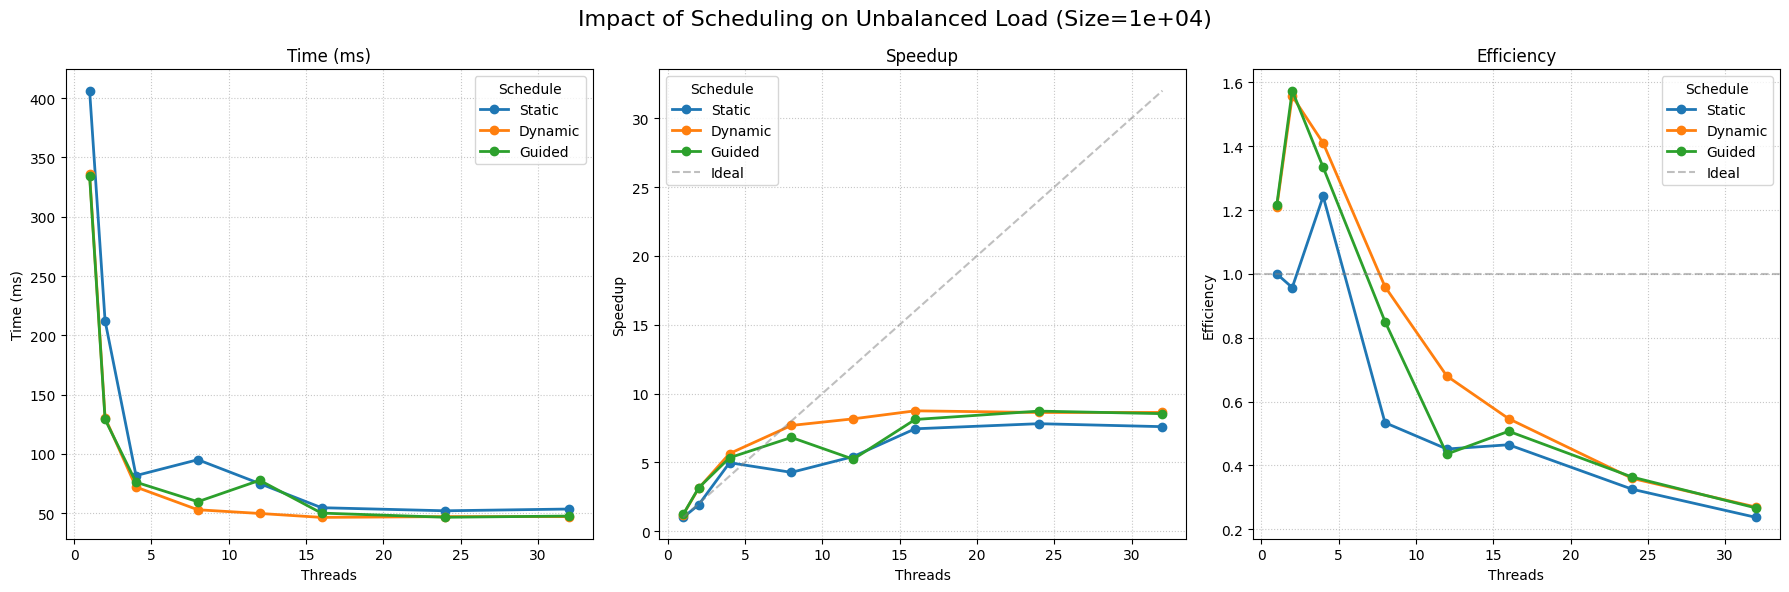

Plotting for Size: 100000


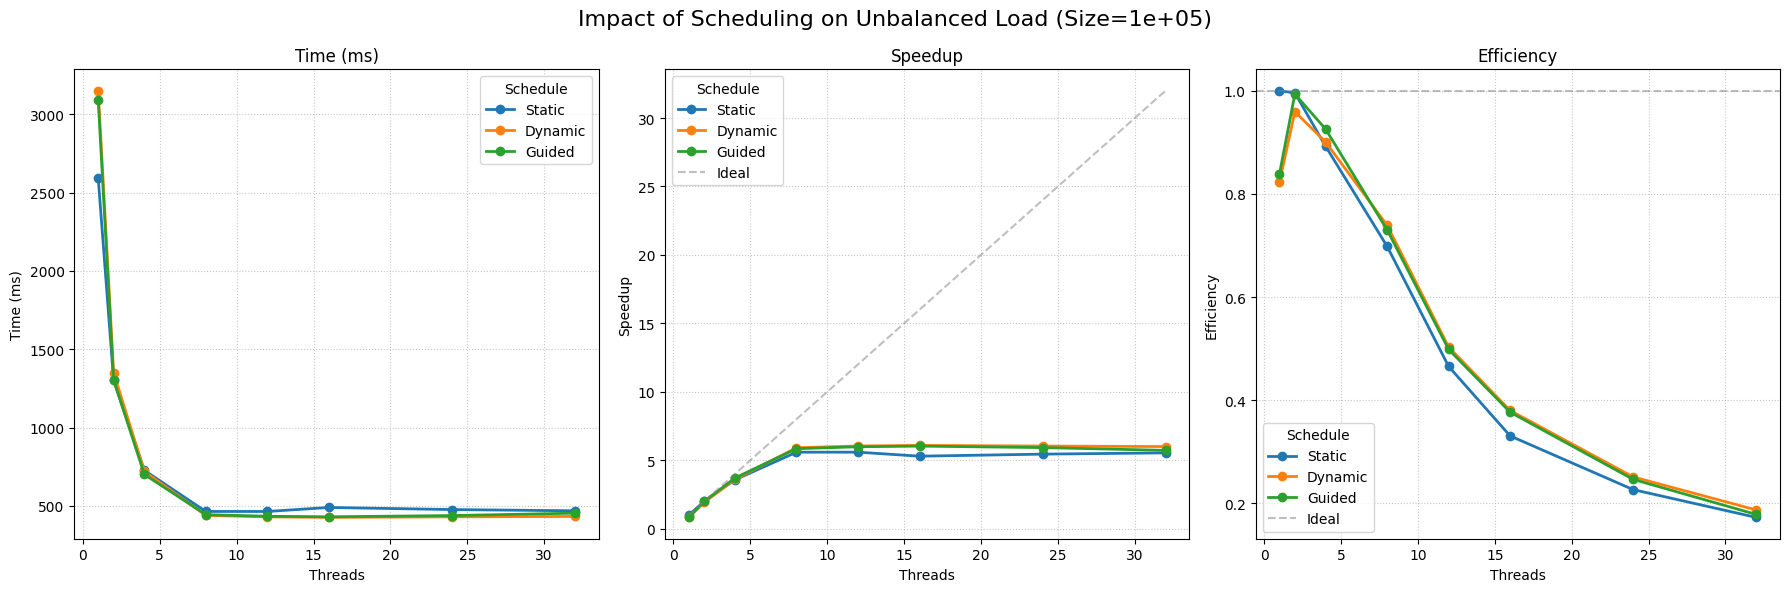

Plotting for Size: 1000000


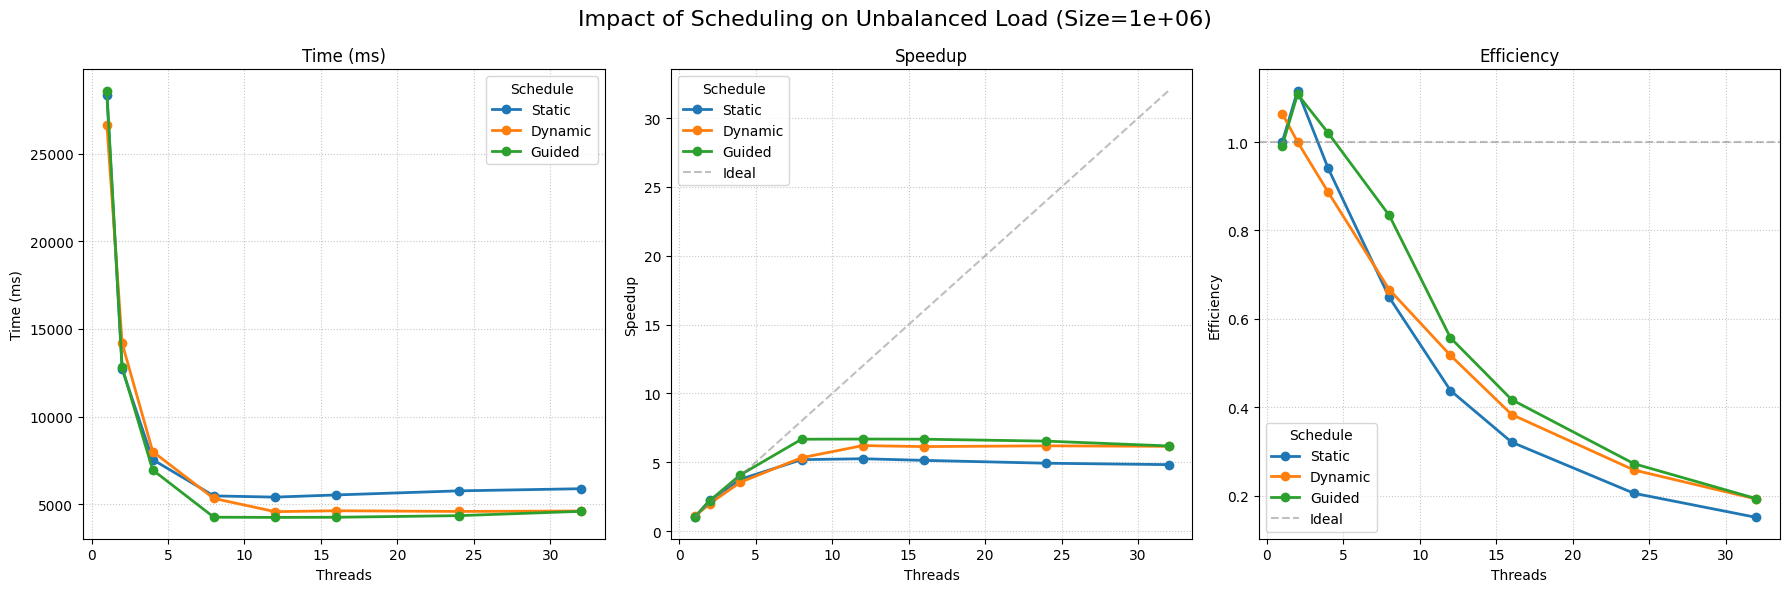

In [25]:
plt.style.use('default')
# 3 графика (Time, Speedup, Efficiency). На каждом графике 3 линии (Static, Dynamic, Guided).
#target_sizes = [sizes[-1]] 
target_sizes = sizes

for s in target_sizes:
    print(f"Plotting for Size: {s}")
    subset_size = df[df['Size'] == s]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for ax, (metric, ylabel) in zip(axes, metrics):
        schedules = subset_size['Schedule'].unique()
        
        for sched in schedules:
            data = subset_size[subset_size['Schedule'] == sched].sort_values('Threads')
            ax.plot(data['Threads'], data[metric], marker='o', linewidth=2, label=sched)
        
        if metric == 'Speedup':
            max_th = df['Threads'].max()
            ax.plot([1, max_th], [1, max_th], '--', color='gray', alpha=0.5, label='Ideal')
        elif metric == 'Efficiency':
            ax.axhline(1.0, linestyle='--', color='gray', alpha=0.5, label='Ideal')
            
        ax.set_title(ylabel)
        ax.set_xlabel('Threads')
        ax.set_ylabel(ylabel)
        ax.grid(True, linestyle=':', alpha=0.7)
        ax.legend(title='Schedule')

    fig.suptitle(f'Impact of Scheduling on Unbalanced Load (Size={s:.0e})', fontsize=16)
    plt.tight_layout()
    plt.show()
